In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sympy import diff, symbols, lambdify
from sympy.abc import x, y
from sklearn import preprocessing

In [2]:
data = pd.read_csv('/Users/yuwenchen/Desktop/2190_3685_bundle_archive/bottle.csv')
data = pd.DataFrame(data)

/Users/yuwenchen/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# predict the water temperature based on salinity
att = data[['T_degC', 'Salnty']]

# remove NAN values
att = att.dropna()

# reset the index
att = att.reset_index(drop=True)

In [5]:
# 0-1 normalization
def normalization (x):
    return (x - min(x)) / (max(x) - min(x))

In [6]:
att['nor_Salnty'] = normalization(att['Salnty'])
att['nor_T_degC'] = normalization(att['T_degC'])

In [7]:
batchSize = 500

In [8]:
x_data = att['nor_Salnty'].loc[:batchSize].tolist()
y_data = att['nor_T_degC'].loc[:batchSize].tolist()
# y_data = b + w * data_x

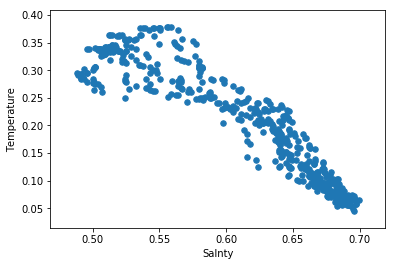

In [9]:
plt.scatter(x_data, y_data, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')
plt.show()

In [10]:
b = random.uniform(-1, 1) # initial b
w = random.uniform(-1, 1) # initial w
lr = 1 # learning rate
iteration = 2000

# store initial vlaues for plotting
b_history = []
w_history = []
loss_history = []

# set the learning rate be different
lr_b = 0
lr_w = 0

x, y, w1, b1 = symbols('x, y, w1, b1')
lossf = (y - (b1 + w1*x))**2
diff_b = lambdify([x, y, w1, b1], diff(lossf, b1))
diff_w = lambdify([x, y, w1, b1], diff(lossf, w1))

# interation start, use gradient descent to find the best b and w that can let the output be the least 
for i in range(iteration):
    b_grad = 0.0
    w_grad = 0.0
    loss = 0.0

    for n in range(len(x_data)):
        
        # compute the loss
        loss = loss + (y_data[n] - (b + w*x_data[n]))**2
        
        # compute ∂L/∂w 
        b_grad = b_grad + diff_b(x_data[n], y_data[n], w, b)
        
        # compute ∂L/∂b
        w_grad = w_grad + diff_w(x_data[n], y_data[n], w, b)
    
    # use Adagrad for leanring rate
    lr_b = lr_b + b_grad ** 2
    lr_w = lr_w + w_grad ** 2
    
    b = b - lr/np.sqrt(lr_b) * b_grad
    w = w - lr/np.sqrt(lr_w) * w_grad
    
    print(b, w, loss)
    
    # for plotting
    loss_history.append(loss)
    b_history.append(b)
    w_history.append(w)

1.3798186943546817 0.2225169126171207 48.351659194246764
0.40642236101427776 -0.7520302681366147 850.8592741067324
0.6003282808007468 -0.5627024367679312 36.448014178488506
0.5675346293044706 -0.5995427478997553 3.2149914485774964
0.5752032718810718 -0.5960043213619166 2.144989716625128
0.5756640308561559 -0.5996435790850069 2.102647258983025
0.577401816082276 -0.6019957964849545 2.0929202059993273
0.5789065291837318 -0.6045675214061815 2.084279574910605
0.5804469466269289 -0.6070906586814641 2.075726316159919
0.5819752522840211 -0.6096129519057232 2.0672284465465163
0.583499974329126 -0.6121259344934914 2.058784618567414
0.5850196133439353 -0.6146311434058552 2.0503944569333274
0.5865344544281114 -0.6171283352130318 2.042057619316571
0.5880444650420517 -0.6196175832340722 2.0337737665295577
0.5895496691154569 -0.6220989043224854 2.025542561577147
0.591050080470492 -0.6245723252843199 2.017363669611448
0.5925457146699621 -0.6270378710587695 2.0092367579174457
0.5940365869090327 -0.6294

0.7859009830954166 -0.9457833810762128 1.1766844902458165
0.786776470204858 -0.9472266196897251 1.173899155905044
0.7876491718368739 -0.9486652664573657 1.1711315150086454
0.7885190968603905 -0.9500993359994431 1.1683814551337406
0.7893862541160329 -0.9515288428896124 1.1656488645721326
0.7902506524162164 -0.9529538016550257 1.162933632325751
0.7911123005452364 -0.9543742267764811 1.1602356481021419
0.7919712072593593 -0.9557901326885716 1.157554802309972
0.7928273812869125 -0.9572015337798334 1.1548909860545664
0.7936808313283737 -0.9586084443928942 1.152244091133479
0.7945315660564608 -0.9600108788246199 1.1496140100320908
0.7953795941162207 -0.9614088513262623 1.14700063591923
0.7962249241251181 -0.9628023761036051 1.1444038626428157
0.7970675646731247 -0.9641914673171098 1.141823584725553
0.7979075243228062 -0.9655761390820616 1.1392596973606257
0.7987448116094118 -0.9669564054687139 1.1367120964074406
0.7995794350409607 -0.9683322805024333 1.1341806783873793
0.80041140309833 -0.96

0.899973781632802 -1.133832199673296 0.8885136059212144
0.9004863790903984 -1.1346772159432579 0.8875586880145091
0.900997346050537 -1.1355195443417303 0.8866098350984855
0.9015066877009086 -1.1363591934205957 0.885667008649177
0.9020144092126857 -1.1371961717045065 0.884730170387356
0.902520515740576 -1.1380304876909728 0.8837992822769793
0.9030250124228743 -1.138862149850448 0.8828743065236391
0.903527904381515 -1.139691166626416 0.8819552055730401
0.9040291967221242 -1.1405175464354764 0.881041942109458
0.9045288945340721 -1.1413412976674315 0.880134479054229
0.9050270028905246 -1.1421624286853707 0.8792327795642486
0.9055235268484949 -1.142980947825756 0.878336807030474
0.9060184714488955 -1.1437968633985074 0.8774465250764233
0.9065118417165888 -1.144610183687087 0.8765618975567153
0.9070036426604393 -1.145420916948584 0.87568288855559
0.9074938792733637 -1.1462290714137986 0.8748094623854558
0.9079825565323826 -1.1470346552873254 0.8739415835854305
0.9084696793986703 -1.147837676

0.9655560807077309 -1.241944548825357 0.791043161005676
0.9658600797816868 -1.2424456910132649 0.7907072922470838
0.9661631119590828 -1.2429452392734228 0.7903735565811084
0.9664651803154958 -1.243443198675912 0.7900419404601379
0.9667662879167168 -1.2439395742746824 0.7897124304226093
0.9670664378187824 -1.2444343711076031 0.78938501309246
0.9673656330680059 -1.244927594196515 0.789059675178584
0.967663876701008 -1.2454192485472804 0.7887364034742982
0.9679611717447477 -1.2459093391498346 0.7884151848567996
0.9682575212165535 -1.2463978709782368 0.7880960062866336
0.9685529281241534 -1.2468848489907203 0.7877788548071705
0.968847395465706 -1.2473702781297429 0.787463717544067
0.9691409262298307 -1.247854163322037 0.7871505817047593
0.9694335233956382 -1.2483365094786605 0.7868394345779304
0.9697251899327607 -1.248817321495045 0.7865302635330031
0.9700159288013821 -1.249296604251048 0.7862230560196185
0.9703057429522681 -1.249774362611 0.7859177995671326
0.9705946353267962 -1.250250601

1.003172367696492 -1.303954964728618 0.7576081075272983
1.0033567265909777 -1.304258880212459 0.7574845818124303
1.0035404991319572 -1.304561829093105 0.7573618405908782
1.0037236871843886 -1.304863814444938 0.7572398788803871
1.003906292607299 -1.3051648393325608 0.7571186917303472
1.004088317253801 -1.3054649068108275 0.7569982742215887
1.0042697629711133 -1.3057640199248757 0.7568786214661823
1.0044506316005783 -1.3060621817101559 0.756759728607243
1.0046309249776817 -1.306359395192464 0.7566415908187346
1.0048106449320704 -1.3066556633879702 0.756524203305269
1.0049897932875715 -1.3069509893032514 0.7564075613019118
1.0051683718622106 -1.3072453759353206 0.7562916600739938
1.0053463824682307 -1.3075388262716574 0.7561764949169182
1.0055238269121096 -1.3078313432902389 0.7560620611559622
1.0057007069945794 -1.3081229299595691 0.7559483541460934
1.005877024510644 -1.3084135892387103 0.7558353692717852
1.0060527812495983 -1.3087033240773116 0.7557231019468165
1.0062279789950446 -1.308

1.026207962854524 -1.3419291246233656 0.7452207265185516
1.0263190574476897 -1.3421122639719052 0.7451758709310298
1.0264297987081905 -1.3422948208518435 0.7451313002126259
1.0265401877598028 -1.3424767971157243 0.7450870125541843
1.0266502257227283 -1.3426581946101994 0.7450430061580412
1.0267599137136063 -1.342839015176047 0.7449992792379443
1.0268692528455239 -1.3430192606481908 0.7449558300189908
1.0269782442280282 -1.343198932855718 0.7449126567375496
1.0270868889671374 -1.343378033621898 0.7448697576411849
1.0271951881653516 -1.3435565647642016 0.7448271309885964
1.0273031429216644 -1.3437345280943187 0.7447847750495411
1.0274107543315738 -1.3439119254181768 0.7447426881047623
1.027518023487094 -1.3440887585359595 0.7447008684459222
1.027624951476765 -1.344265029242125 0.7446593143755367
1.0277315393856652 -1.3444407393254236 0.7446180242068973
1.027837788295422 -1.3446158905689167 0.7445769962640123
1.027943699284222 -1.344790484749994 0.7445362288815288
1.0280492734268227 -1.34

1.0408786727404504 -1.3661137783278625 0.740533741773864
1.0409431077283964 -1.3662199993552326 0.7405186522762282
1.0410073377838178 -1.366325882551499 0.7405036586088051
1.0410713635584958 -1.3664314289911221 0.7404887601629956
1.0411351857021385 -1.3665366397451455 0.7404739563340667
1.0411988048623875 -1.3666415158812057 0.7404592465211248
1.041262221684825 -1.366746058463544 0.740444630127098
1.0413254368129794 -1.3668502685530168 0.7404301065586946
1.0413884508883324 -1.3669541472071067 0.7404156752264043
1.041451264550326 -1.3670576954799323 0.7404013355444499
1.041513878436368 -1.36716091442226 0.740387086930782
1.0415762931818386 -1.3672638050815147 0.7403729288070421
1.0416385094200984 -1.3673663685017887 0.7403588605985485
1.041700527782492 -1.3674686057238552 0.7403448817342668
1.0417623488983572 -1.3675705177851758 0.7403309916467906
1.0418239733950296 -1.367672105719913 0.7403171897723173
1.0418854018978498 -1.3677733705589403 0.7403034755506223
1.0419466350301696 -1.3678

1.0491990486401226 -1.379829911530601 0.7389829020974472
1.049237021072849 -1.3798925090565177 0.7389776616507135
1.0492748727361532 -1.3799549074941364 0.738972454484923
1.049312604014137 -1.380017107476648 0.7389672803887103
1.04935021528968 -1.3800791096352303 0.7389621391520628
1.049387706944445 -1.3801409145990529 0.7389570305662927
1.0494250793588804 -1.3802025229952848 0.738951954424044
1.0494623329122241 -1.3802639354491004 0.7389469105192743
1.049499467982509 -1.3803251525836855 0.7389418986472485
1.0495364849465645 -1.3803861750202437 0.7389369186045356
1.0495733841800223 -1.3804470033780036 0.7389319701889926
1.0496101660573192 -1.3805076382742236 0.738927053199762
1.0496468309517009 -1.380568080324199 0.7389221674372649
1.0496833792352263 -1.380628330141269 0.7389173127031852
1.0497198112787707 -1.380688388336821 0.738912488800467
1.0497561274520302 -1.3807482555202986 0.7389076955333083
1.0497923281235249 -1.3808079322992066 0.7389029327071495
1.0498284136606026 -1.3808674

1.0538281957561153 -1.3874610569672805 0.7384670777183342
1.0538514454215415 -1.3874993840227525 0.7384651131599205
1.0538746211426027 -1.387537589180996 0.7384631610779874
1.053897723154475 -1.387575672829699 0.7384612213933004
1.0539207516915872 -1.3876136353553168 0.7384592940271264
1.0539437069876219 -1.3876514771430748 0.738457378901234
1.0539665892755186 -1.3876891985769744 0.7384554759378866
1.053989398787476 -1.3877268000397944 0.7384535850598428
1.0540121357549546 -1.3877642819130973 0.7384517061903524
1.0540348004086784 -1.3878016445772314 0.738449839253152
1.0540573929786377 -1.3878388884113355 0.7384479841724609
1.0540799136940913 -1.3878760137933428 0.7384461408729807
1.0541023627835686 -1.3879130210999842 0.738444309279892
1.054124740474873 -1.387949910706792 0.7384424893188521
1.0541470469950824 -1.3879866829881056 0.738440680915986
1.054169282570553 -1.388023338317072 0.7384388839978894
1.0541914474269212 -1.3880598770656527 0.7384370984916285
1.0542135417891052 -1.3880

1.0567472537439317 -1.3922731218033453 0.7382693541941883
1.0567612194964007 -1.3922961443354964 0.7382686453345708
1.0567751408315194 -1.3923190936456806 0.7382679409767647
1.0567890178905552 -1.3923419699667765 0.7382672410921814
1.0568028508143261 -1.392364773530922 0.7382665456524101
1.056816639743202 -1.3923875045695169 0.7382658546292247
1.0568303848171061 -1.392410163313225 0.7382651679945764
1.056844086175517 -1.3924327499919766 0.7382644857205947
1.0568577439574698 -1.3924552648349704 0.7382638077795841
1.056871358301557 -1.3924777080706763 0.738263134144029
1.0568849293459304 -1.3925000799268377 0.738262464786585
1.0568984572283027 -1.3925223806304736 0.7382617996800845
1.0569119420859483 -1.392544610407881 0.738261138797528
1.0569253840557051 -1.3925667694846369 0.7382604821120926
1.056938783273976 -1.3925888580856012 0.7382598295971213
1.0569521398767299 -1.3926108764349185 0.7382591812261299
1.056965453999503 -1.3926328247560207 0.7382585369728002
1.056978725777401 -1.3926

1.058458343179907 -1.3950938514163278 0.7381993144182771
1.0584668669015171 -1.395107902764816 0.7381990503659013
1.058475363513875 -1.3951219094237235 0.7381987879904653
1.0584838331032007 -1.3951358715351827 0.7381985272813173
1.0584922757554391 -1.3951497892408748 0.7381982682278767
1.0585006915562625 -1.3951636626820298 0.7381980108196261
1.0585090805910702 -1.3951774919994289 0.7381977550461208
1.0585174429449904 -1.395191277333405 0.7381975008969757
1.05852577870288 -1.3952050188238456 0.7381972483618764
1.0585340879493264 -1.3952187166101926 0.738196997430571
1.0585423707686479 -1.3952323708314447 0.7381967480928763
1.0585506272448946 -1.3952459816261582 0.7381965003386699
1.0585588574618494 -1.395259549132449 0.7381962541578958
1.0585670615030283 -1.3952730734879941 0.7381960095405623
1.0585752394516823 -1.3952865548300317 0.7381957664767406
1.0585833913907972 -1.3952999932953642 0.738195524956563
1.058591517403095 -1.3953133890203586 0.738195284970226
1.0585996175710346 -1.395

1.0596230659030985 -1.3970138959256593 0.7381710283786974
1.059627885284882 -1.3970218406728063 0.738170943964746
1.0596326893388734 -1.3970297601520998 0.7381708600868888
1.059637478113822 -1.3970376544439032 0.7381707767417205
1.0596422516583222 -1.3970455236283237 0.7381706939258609
1.059647010020813 -1.3970533677852142 0.7381706116359442
1.0596517532495808 -1.3970611869941734 0.7381705298686356
1.0596564813927571 -1.397068981334547 0.7381704486206127
1.0596611944983212 -1.397076750885428 0.7381703678885768
1.0596658926140992 -1.3970844957256585 0.7381702876692523
1.0596705757877651 -1.397092215933829 0.7381702079593839
1.059675244066842 -1.3970999115882807 0.7381701287557341
1.0596798974987012 -1.3971075827671053 0.7381700500550904
1.0596845361305631 -1.3971152295481466 0.7381699718542579
1.0596891600094989 -1.397122852009 0.7381698941500611
1.0596937691824293 -1.3971304502270148 0.7381698169393465
1.059698363696126 -1.3971380242792941 0.7381697402189796
1.0597029435972116 -1.39714

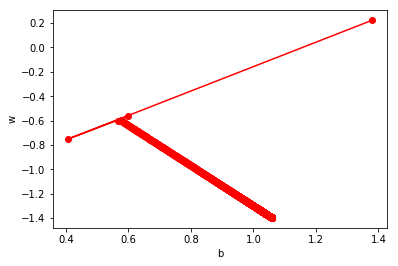

In [11]:
plt.plot(b_history, w_history, 'o-', color = 'red')
plt.xlabel('b')
plt.ylabel('w')
plt.show()

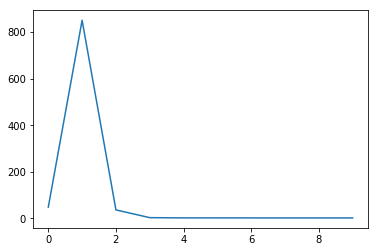

In [12]:
# visualize the loss
fig = plt.figure()
plt.plot(range(0,10), loss_history[0:10])    
plt.show()

In [13]:
def denomalization(x, y, w, b):
    A = max(y)-min(y)
    B = max(x)-min(x)
    den_w = (w*A)/B
    den_b = -1*((A*w*min(x))/B)+(A*b)+min(y)
    return den_w, den_b

In [14]:
w, b

(-1.3981173873322277, 1.0602924574249022)

In [15]:
x_output = att['T_degC'].loc[:batchSize].tolist()
y_output = att['Salnty'].loc[:batchSize].tolist()

res_w, res_b = denomalization(x_output, y_output, w, b)
res_w, res_b

(-0.2575479397717262, 35.275715545078725)

In [16]:
type(res_w)

numpy.float64

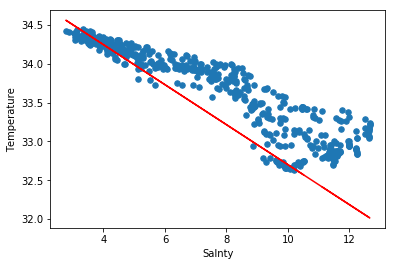

In [17]:
# x_output = att['nor_Salnty'].loc[:batchSize].tolist()
# y_output = att['T_degC'].loc[:batchSize].tolist()

plt.scatter(x_output, y_output, s = 30)
plt.xlabel('Salnty')
plt.ylabel('Temperature')

x_ = pd.Series(x_output)
y_ = res_w*x_ + res_b

# predicted fucntion 
plt.plot(x_, y_, color = 'red')
plt.show()